In [1]:
import pandas as pd
%pylab inline
from scipy.optimize import curve_fit
from lmfit import minimize, Parameters

Populating the interactive namespace from numpy and matplotlib


In [2]:
doble = pd.read_csv("DobleRendija.csv")
izq = pd.read_csv("izquierda.csv")
der = pd.read_csv("derecha.csv")

In [6]:
def lum(a, d ,l,the) :
    d1 = (np.pi*a*np.sin(the)/l)
    d2 = (np.pi*d*np.sin(the)/l)
    return (99.82)*(( 1-( (d1**2)/6 ) + ( (d1**4)/120 )-( (d1**6)/5040) )**2)*(np.cos(d2)**2)

In [12]:
L = 503
centro = np.array(doble["X_(mm)_"])[doble[['V_(mV)_']].idxmax() ]
dob_x = np.arctan((doble["X_(mm)_"] - centro )/L)
#popt, bas =curve_fit(lum, np.sin(dob_x), doble["V_(mV)_"])
params = Parameters()
params.add('a', value=0.01)
params.add('l', value=500)
params.add('d', value=0.2)
print(len(params) )
out = minimize(lum, params, args=(dob_x))

3


TypeError: lum() takes 4 positional arguments but 94 were given

[ -5.50398591 566.21549472 476.38338697]


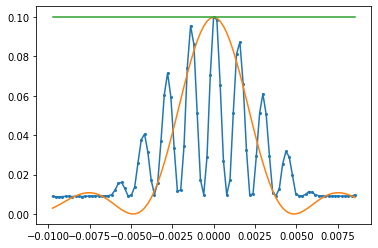

In [9]:
print(popt)
plt.plot( dob_x,doble["V_(mV)_"])
plt.plot(dob_x, lum( np.sin(dob_x), *popt))
plt.plot(dob_x, lum( np.sin(dob_x), 659, 0.4, 0.08))
plt.scatter(dob_x,doble["V_(mV)_"], s=4)
